In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import warnings
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_csv('student_evaluation.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [80]:
from sklearn.cluster import KMeans

In [81]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [83]:
km.predict(df)

array([2, 2, 0, ..., 0, 1, 1])

In [84]:
km.inertia_

180375.76659547855

In [85]:
kmm=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit(df)
    kmm.append(km.inertia_)
    

In [86]:
x=pd.DataFrame({'Cluster':range(1,20),'Inertia':kmm})
x

,Cluster,Inertia
0,1,373025.672852
1,2,231353.758686
2,3,180375.766595
3,4,152888.206441
4,5,133015.723147
5,6,119620.319351
6,7,112340.716315
7,8,105894.383428
8,9,101789.076850
9,10,97528.947993


No handles with labels found to put in legend.


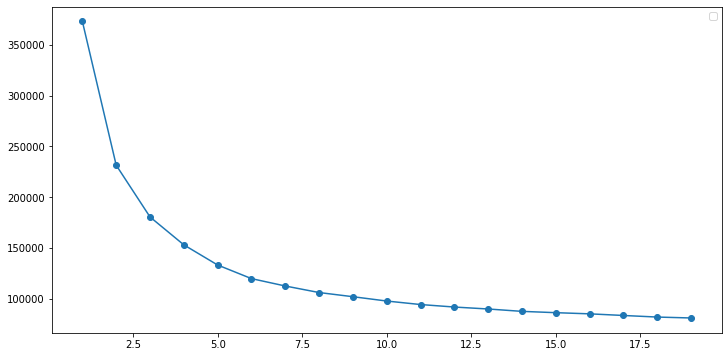

In [87]:
plt.figure(figsize=(12,6))
plt.plot(x['Cluster'],x['Inertia'],marker='o')
plt.legend()

In [96]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
ss=s.fit_transform(df)
ss

array([[-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       ...,
       [ 0.71607035,  1.55204221, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036]])

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [97]:
kmm=KMeans(n_clusters=3,n_jobs=-1)

In [98]:
kmm.fit(ss)
kmm.score(ss)

-73956.57647075757

In [100]:
kmm.inertia_

73956.57647075757

In [102]:
k=[]
for i in range(1,20):
    kmm=KMeans(n_jobs=-1,n_clusters=i)
    kmm.fit(ss)
    k.append(kmm.inertia_)

In [104]:
xx=pd.DataFrame({'Cluster':range(1,20),'Inertia':k})
xx

,Cluster,Inertia
0,1,192060.000000
1,2,105150.065103
2,3,73956.576471
3,4,65555.532999
4,5,60429.536567
5,6,57626.854512
6,7,56274.941744
7,8,54213.362116
8,9,52887.416914
9,10,51756.406461


No handles with labels found to put in legend.


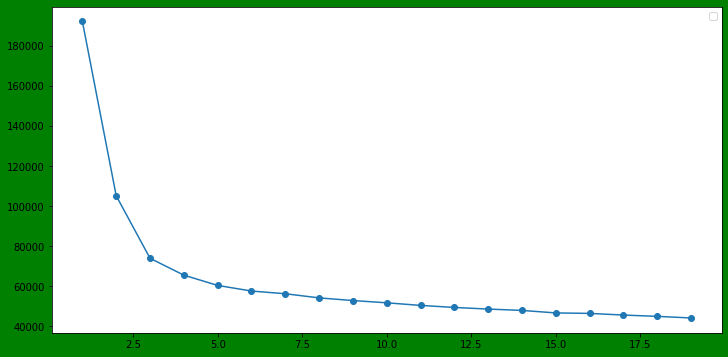

In [115]:
plt.figure(figsize=(12,6),facecolor='g',edgecolor='g')
plt.plot(xx['Cluster'],xx['Inertia'],marker='o')
plt.legend()

In [127]:
kmm=KMeans(n_jobs=-1,n_clusters=2)
kmm.fit(ss)
predict=kmm.predict(ss)
predict

array([0, 0, 1, ..., 1, 0, 0])

In [129]:
pd.Series(predict).value_counts()

0    3144
1    2676
dtype: int64